In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                     
warnings.filterwarnings("ignore")

In [2]:
test = pd.read_csv("test.csv")
print(test.head(10))

      ID  age            job   marital  education default  balance housing  \
0  38441   32       services   married  secondary      no      118     yes   
1  40403   78        retired  divorced    primary      no     2787      no   
2   3709   31  self-employed    single   tertiary      no      144     yes   
3  37422   57       services    single    primary      no     3777     yes   
4  12527   45    blue-collar  divorced  secondary      no     -705      no   
5  16013   32     management    single   tertiary      no        0     yes   
6    196   33    blue-collar    single  secondary      no      307     yes   
7   8516   37     management   married  secondary      no      341      no   
8  31208   36     technician  divorced   tertiary      no     1381      no   
9  38462   50         admin.    single    primary      no      181     yes   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no   cellular   15   may        20         6     -1         

In [3]:
train = pd.read_csv("train.csv")
print(train.head(10))

      ID  age          job   marital  education default  balance housing loan  \
0  26110   56       admin.   married    unknown      no     1933      no   no   
1  40576   31      unknown   married  secondary      no        3      no   no   
2  15320   27     services   married  secondary      no      891     yes   no   
3  43962   57   management  divorced   tertiary      no     3287      no   no   
4  29842   31   technician   married  secondary      no      119     yes   no   
5  29390   33   management    single   tertiary      no        0     yes   no   
6  40444   56      retired   married  secondary      no     1044      no   no   
7  40194   50   technician    single  secondary      no     1811      no   no   
8  29824   45  blue-collar  divorced  secondary      no     1951     yes   no   
9  44676   35       admin.   married  secondary      no     1204      no   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44  

In [4]:
test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [5]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

<h2 style="color:red;"> Checking Null Values<h2 style="color:red;">

In [6]:
round(test.isnull().sum() / test.shape[0] * 100.00,2).to_frame().rename(columns = {0: 'Null_per'})

,Null_per
ID,0.0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
balance,0.0
housing,0.0
loan,0.0
contact,0.0


In [7]:
round(train.isnull().sum() / train.shape[0] * 100.00,2).to_frame().rename(columns = {0: 'Null_per'})

,Null_per
ID,0.0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
balance,0.0
housing,0.0
loan,0.0
contact,0.0


Our data does not have any Null values. Hence, we will skip this part of data cleaning.

<h2 style="color:red;">Finding Outliers/ Univariate Analysis</h2>

In [8]:
# from the column description we can say below are the categorical variables and continous variables in the test table

continous = ['ID','balance','day','duration','campaign','pdays','previous']
categorical = ['age','job','marital','education', 'default', 'housing','loan','contact','month','poutcome','subscribed']

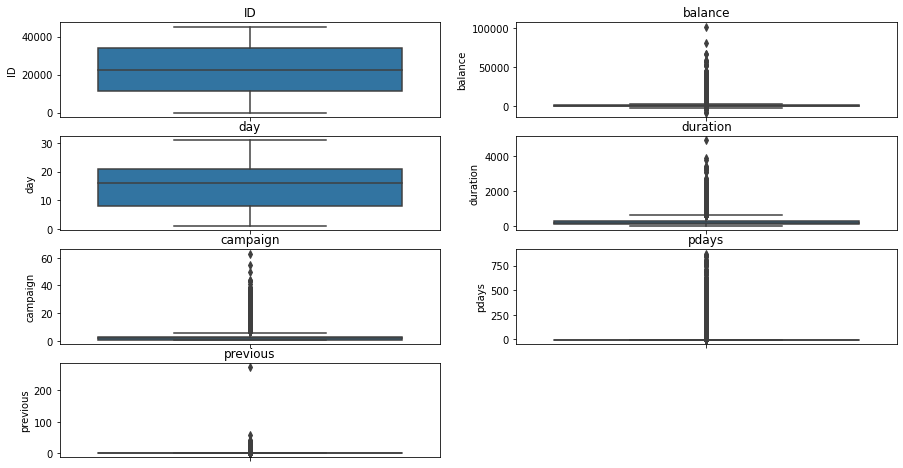

In [9]:
plt.figure(figsize=(15,8))

j=1
for col in continous:
    plt.subplot(4,2,j)
    sns.boxplot(y= train[col])
    plt.title(col)
    j=j+1

As we can see that we have outliers present in balance, duration,campaign,pdays and previous. 
We will not be removing any Outliers as these are outliers are not errors but legitimate data points.

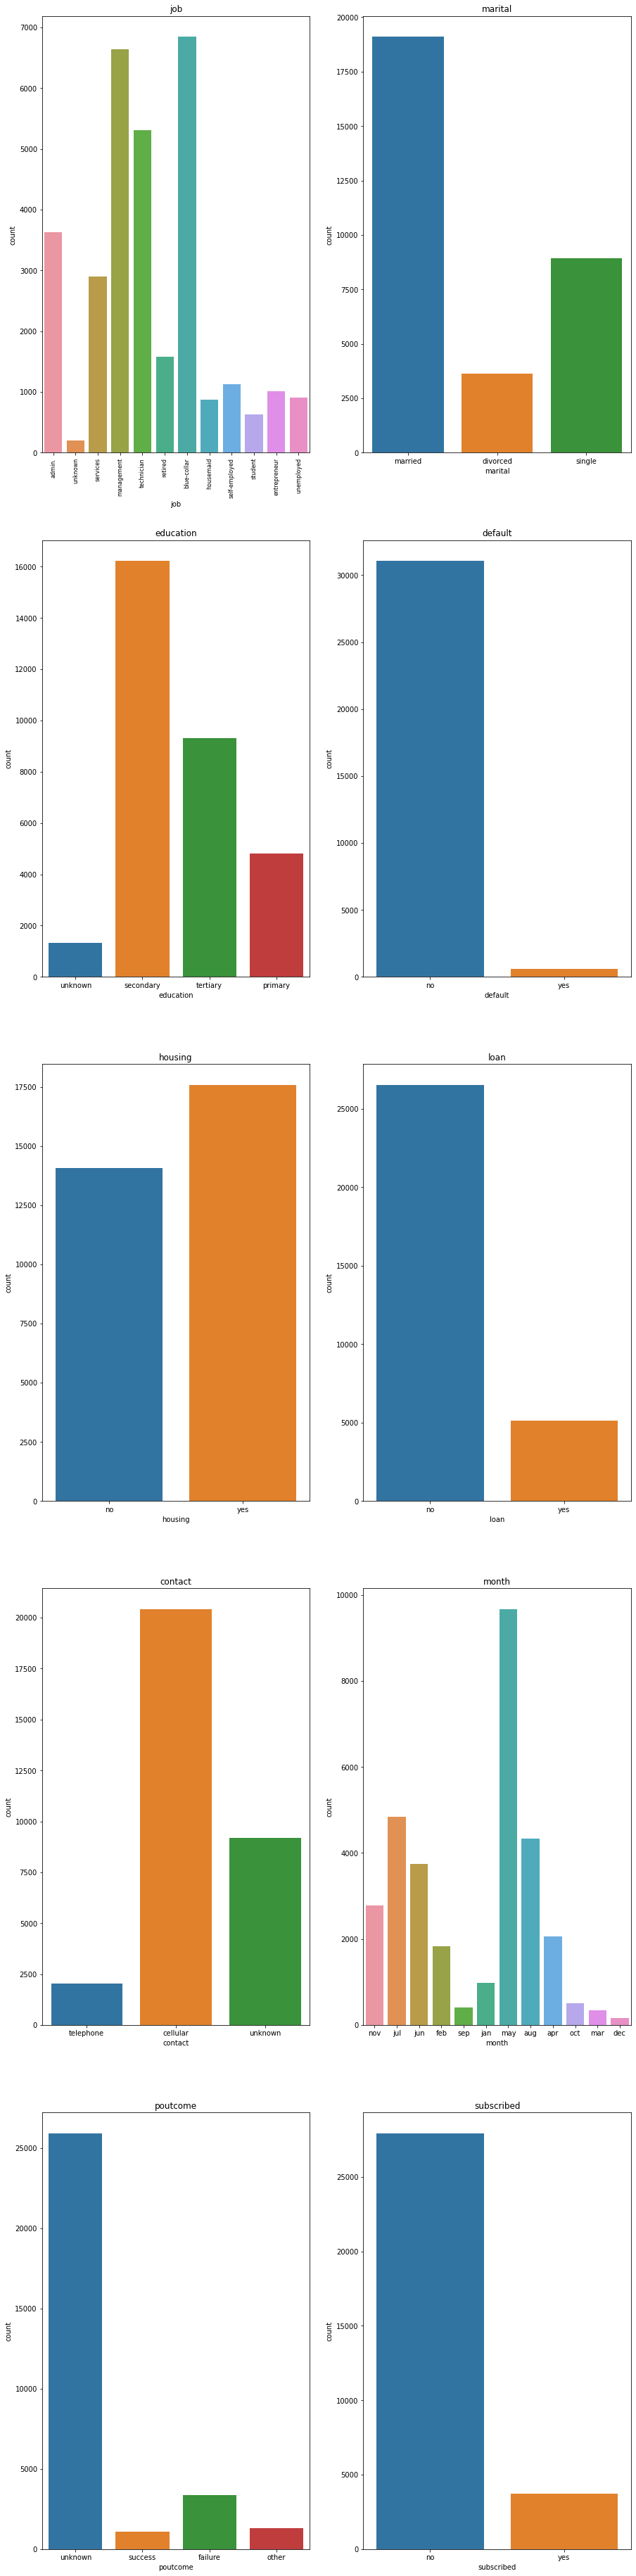

In [10]:
plt.figure(figsize=(15,10))

j=1
for col in categorical:
    if (col != 'age'):
          if(col == 'job'):
               plt.subplot(5,2,j)
               sns.countplot(x= train[col])
               plt.xticks(fontsize=8, rotation = 'vertical')
               plt.title(col)
               j=j+1
          else:
                  plt.subplot(5,2,j)
                  sns.countplot(x= train[col])
                  plt.title(col)
                  j=j+1
                

plt.subplots_adjust(bottom=1, top= 6)

1. Most of the Client data that we have is of the people having Blue_collar, Management and Technician job while students are the least. 
2. We have a very few Clients that are defaulters. 
3. Most clients have active personal loans. 
4. Most of the contacts were made on the month of may. 
5. We dont have data on the outcome of most of the previous Marketing Campaigns.
6. Small ratio of the Clients have subscribed to a term deposit.

We haven't plotted the Age as we need to convert age into categories. We will convert the age into categories in both test and train data set.

In [11]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train['age_cat'] = pd.cut(train['age'], bins)
train.drop('age', axis = 1, inplace = True)
print(train)

# Removing the age fiels categorical list and adding age_cat
categorical.remove('age')
categorical.append('age_cat')

print(categorical)

          ID         job   marital  education default  balance housing loan  \
0      26110      admin.   married    unknown      no     1933      no   no   
1      40576     unknown   married  secondary      no        3      no   no   
2      15320    services   married  secondary      no      891     yes   no   
3      43962  management  divorced   tertiary      no     3287      no   no   
4      29842  technician   married  secondary      no      119     yes   no   
...      ...         ...       ...        ...     ...      ...     ...  ...   
31642  36483  management    single   tertiary      no        0     yes   no   
31643  40178  management  divorced   tertiary      no      380      no  yes   
31644  19710  management    single   tertiary      no      312      no   no   
31645  38556  technician   married  secondary      no      225     yes   no   
31646  14156  management  divorced  secondary      no      204     yes   no   

         contact  day month  duration  campaign  pd

In [12]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
test['age_cat'] = pd.cut(test['age'], bins)
test.drop('age', axis = 1, inplace = True)
print (test)

          ID            job   marital  education default  balance housing  \
0      38441       services   married  secondary      no      118     yes   
1      40403        retired  divorced    primary      no     2787      no   
2       3709  self-employed    single   tertiary      no      144     yes   
3      37422       services    single    primary      no     3777     yes   
4      12527    blue-collar  divorced  secondary      no     -705      no   
...      ...            ...       ...        ...     ...      ...     ...   
13559  23465     management   married   tertiary      no       45      no   
13560  11743    blue-collar   married    primary      no     2281     yes   
13561  28292        retired   married    primary      no      285     yes   
13562  45163         admin.    single  secondary      no      464      no   
13563  34839         admin.   married  secondary      no        2     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0 

Text(0.5, 1.0, 'subscribed')

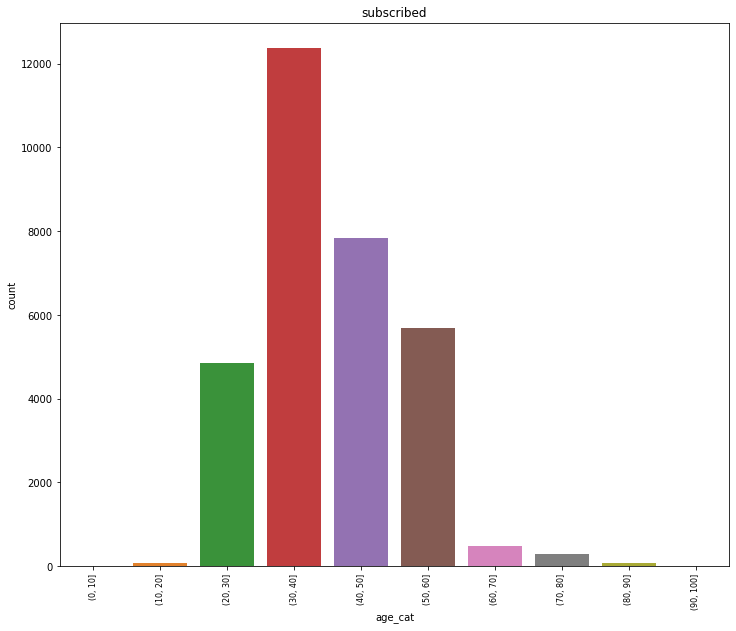

In [13]:
plt.figure(figsize=(12,10))
sns.countplot(x= train['age_cat'])
plt.xticks(fontsize=8, rotation = 'vertical')
plt.title(col)


Most of the Clients are between the age of 20 to 60 and the clients between the age of the 30 to 40 are the highest.

<h2 style="color:red;">Bivariate Analysis</h2>

<AxesSubplot:>

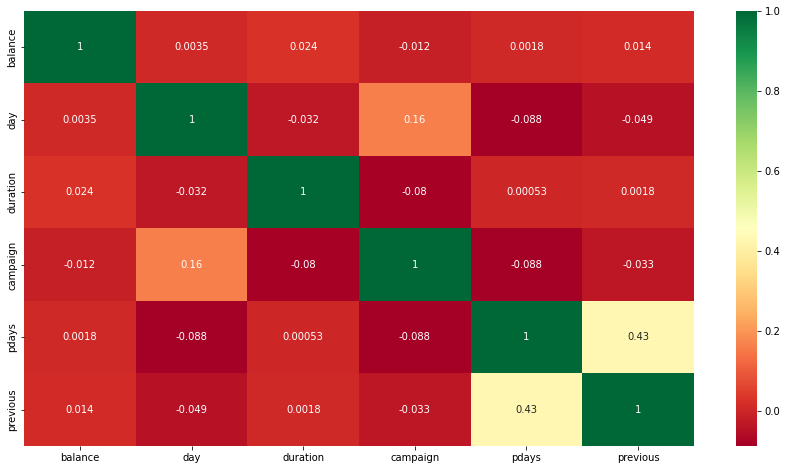

In [14]:
corr = train[continous].drop('ID', axis = 1).corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True, cmap ="RdYlGn")

# ID is not relevant for the matrix. 

There is not much insights from the correlation matrix as the target variable cannot be used as it is a categorical variable. However, we can observe that pdays and previous columns have highest correlation between each other.

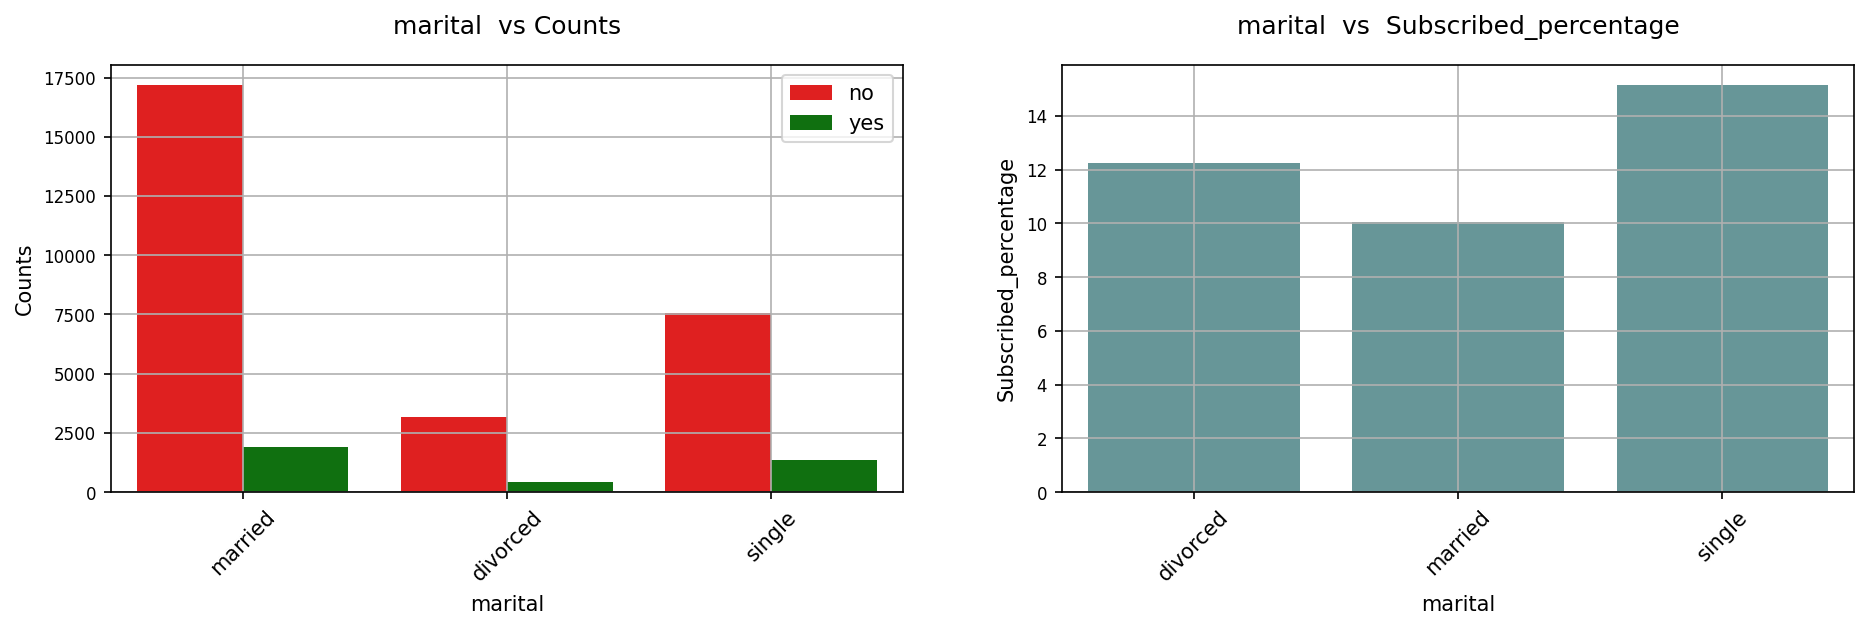

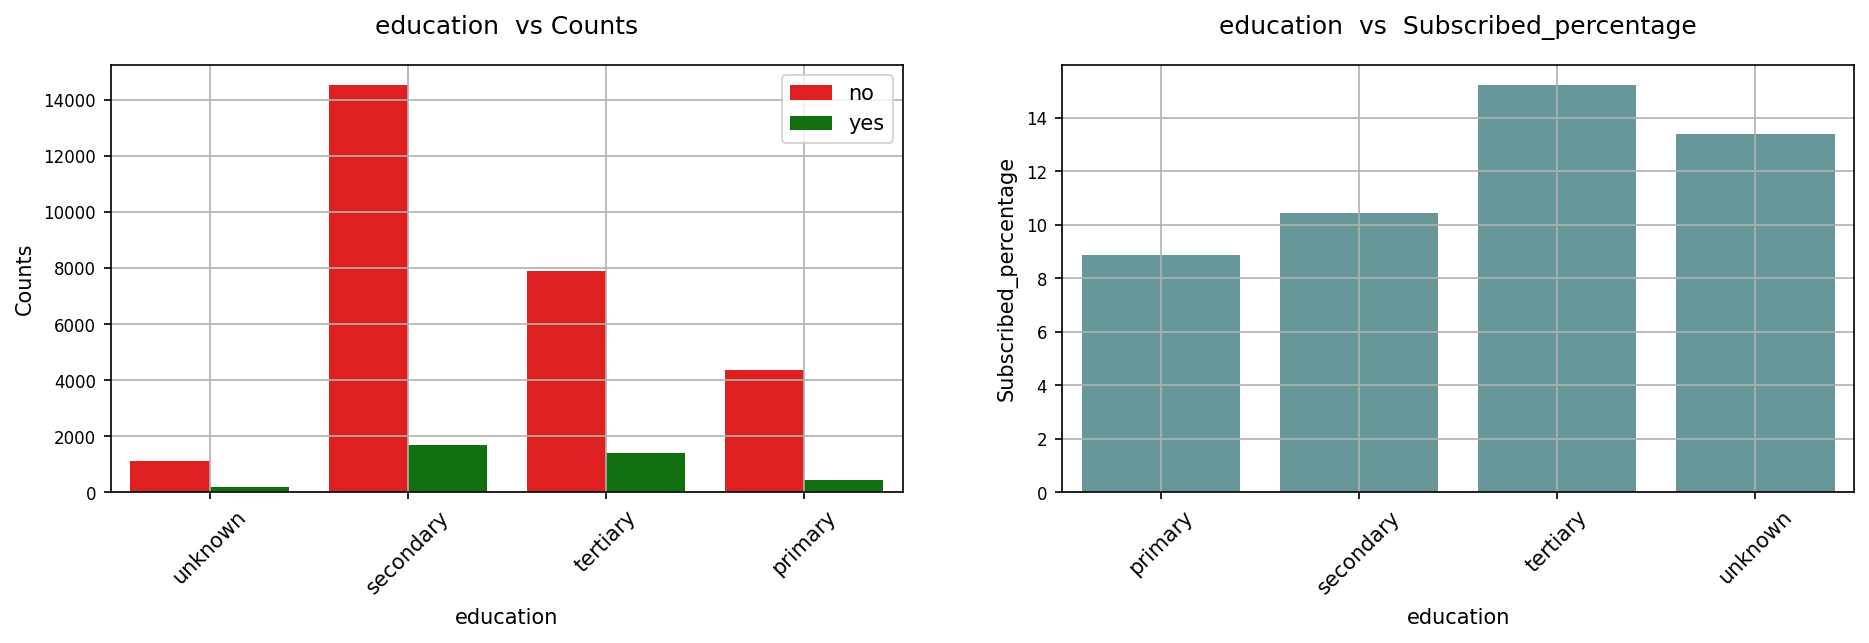

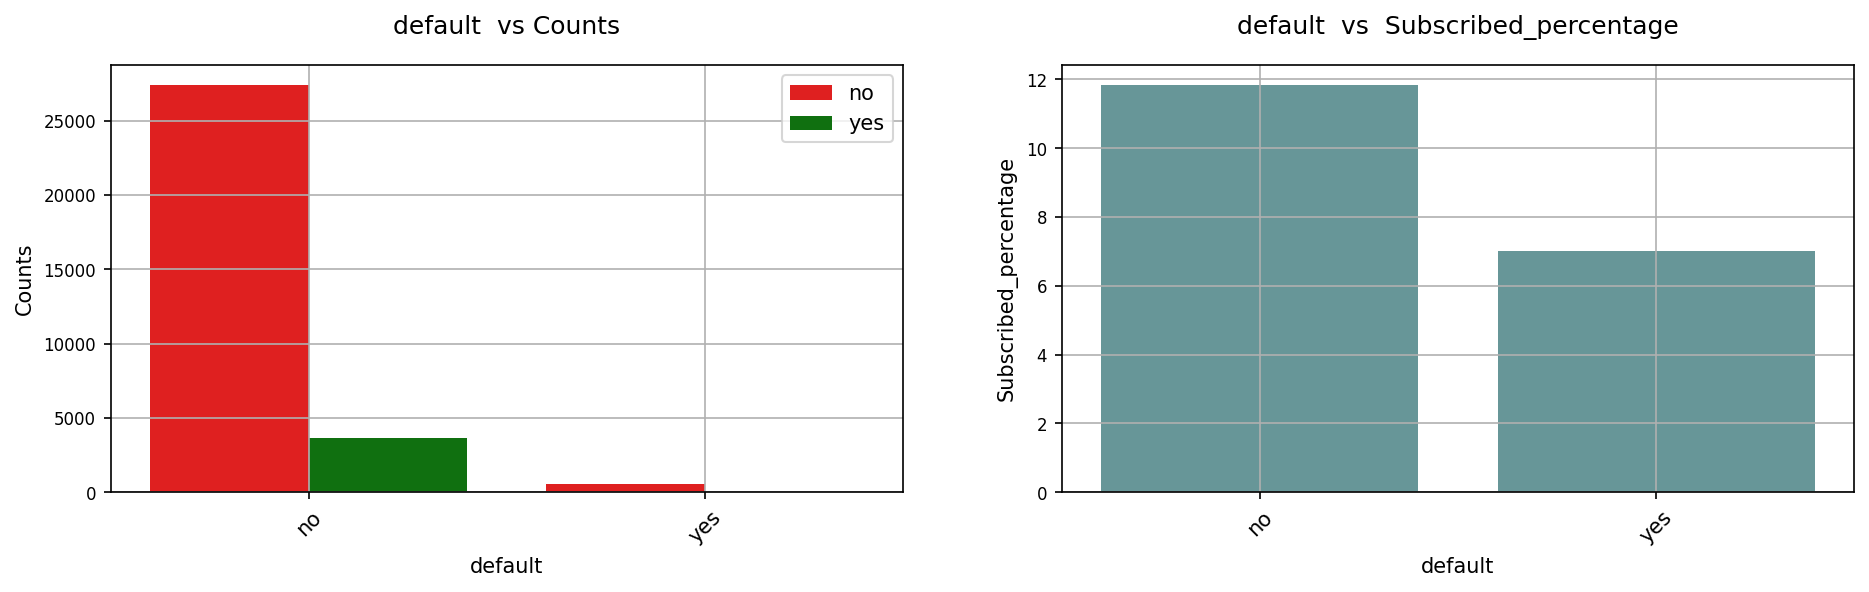

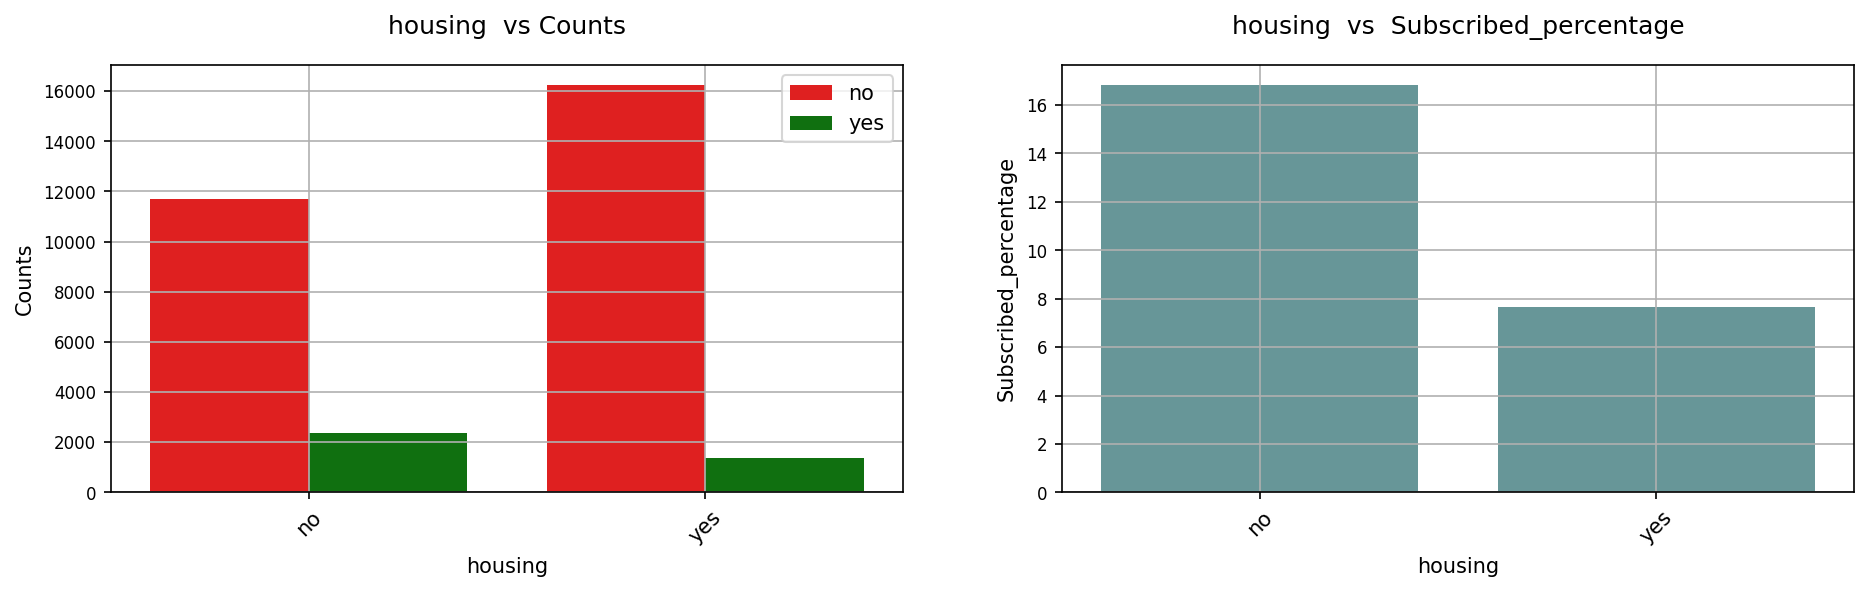

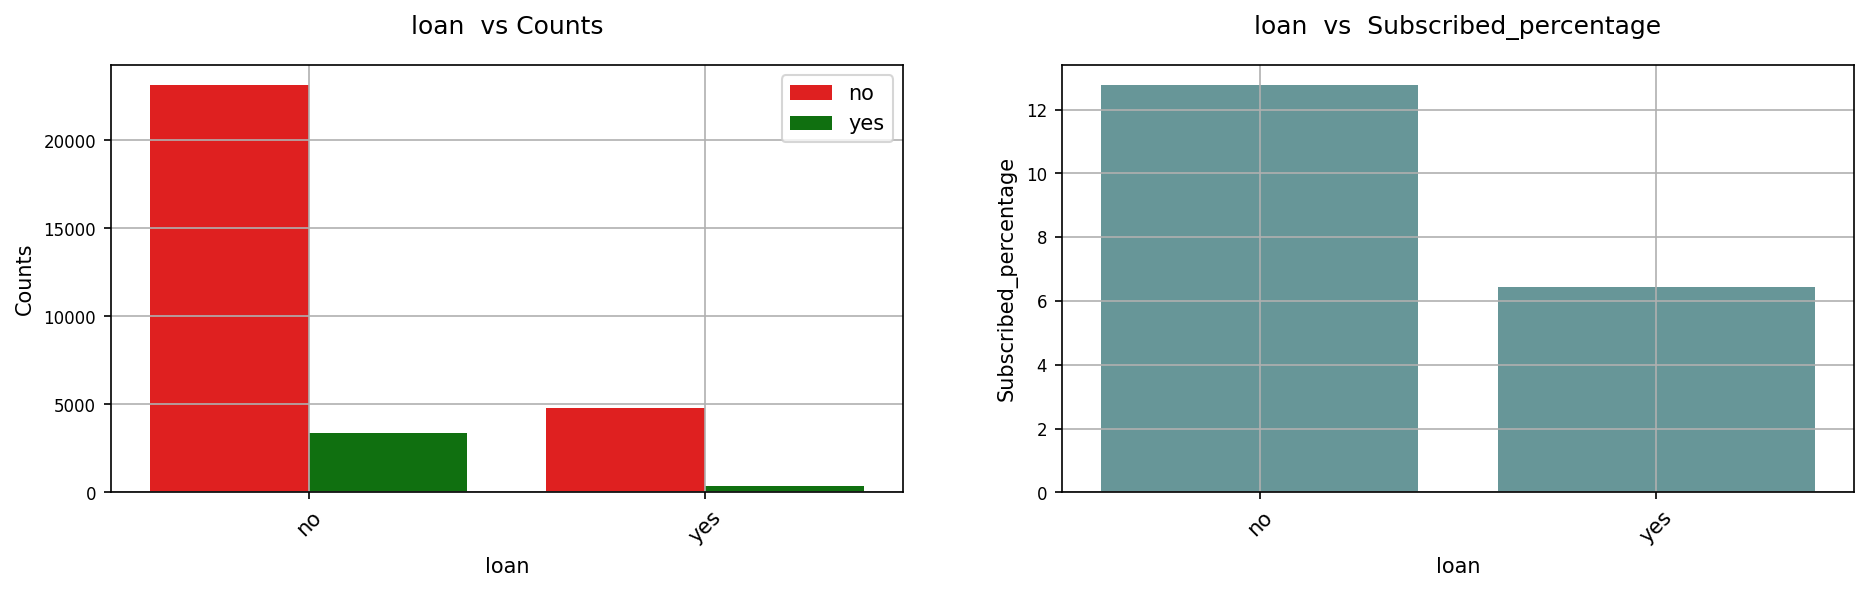

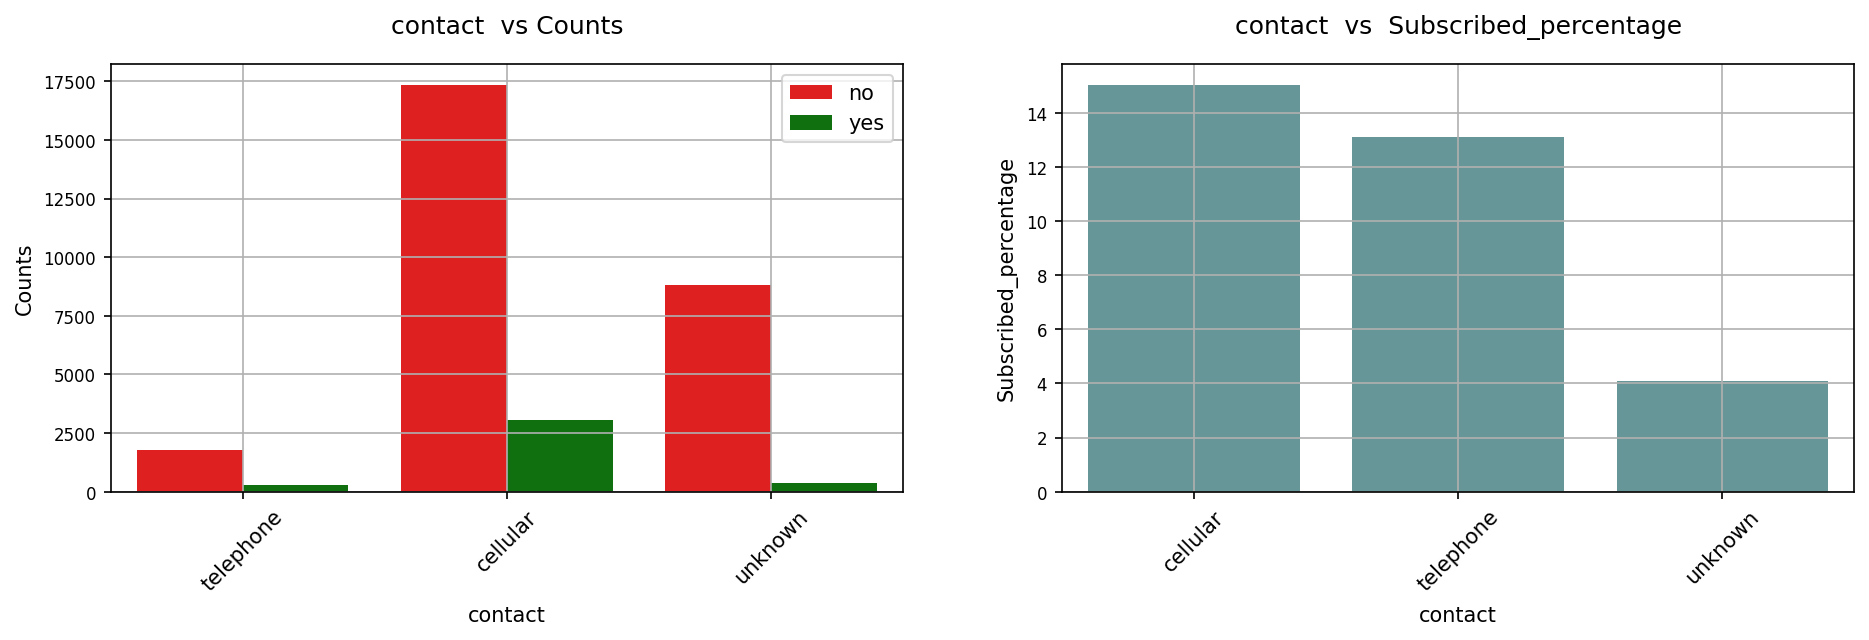

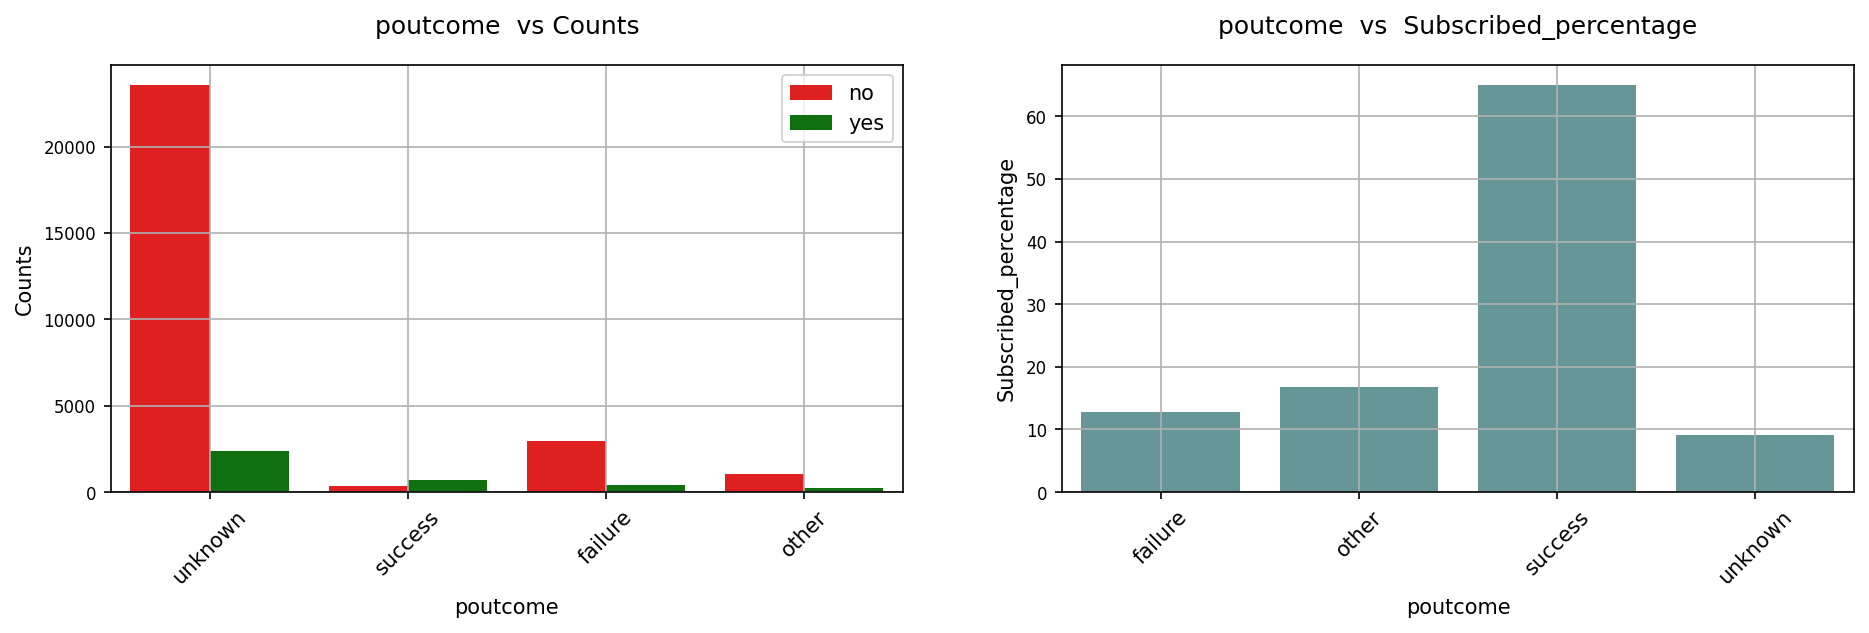

<Figure size 432x288 with 0 Axes>

In [15]:
i=1

for col in train[categorical].columns:
    if (col != 'subscribed' and train[col].nunique()<=5):
                           
                              fig1 = plt.figure(figsize=(15,40), dpi =150)

                              plt.subplot(9, 2, i)
                              ax1 = sns.countplot(x = train[col], hue=train["subscribed"],palette=["r","g"])
                              plt.yticks(fontsize=8)
                              plt.xticks(fontsize=10,rotation = 45)
                              ax1.set_title(col + '  vs Counts', pad = 15,loc = 'center')
                              plt.xlabel(col, labelpad =5 )
                              plt.ylabel("Counts")
                              ax1.set(xlabel= col, ylabel = "Counts")
                              ax1.grid(True)
                              plt.legend()

                              Subs_per = train[[col,'subscribed']]
                              total_num = Subs_per.groupby(col).count()
                              Subs_per = Subs_per[Subs_per['subscribed'] == 'yes'].groupby([col]).count()
                              temp_df = Subs_per/total_num *100

                              i = i+1
                              plt.subplot(9, 2, i)
                              ax2 = sns.barplot(x = temp_df.index, y = temp_df['subscribed'],palette=["cadetblue"])
                              plt.yticks(fontsize=8)
                              plt.xticks(fontsize=10,rotation = 45)
                              ax2.set_title(col + "  vs  Subscribed_percentage", pad = 15,loc = 'center')
                              plt.xlabel(col, labelpad =5 )
                              plt.ylabel("Subscribed_percentage")
                              ax2.set(xlabel= col, ylabel = "Subscribed_percentage")
                              ax2.grid(True)
                              plt.show()

                              i = i+1

plt.subplots_adjust(left= 0.1, right=1, bottom=0.1, top=1, wspace=0.4, hspace=5,)
plt.show()


# Plotting the variable and checking the ratio of subscribed and un subscribed clients. 
# Also, displaying the subscribed percentage for which category within each variable. 
# These plots are only for variables having less than 5 categories. 

1. Those clients with which had success in the previous campaign are subscribing.
2. There percentage of subscribed clients with no housing and personal loan slightly higher than those having these loans. 

<h2 style="color:red;">Classification Model<h2 style="color:red;">

We can use logistic regression or decision tree to make our model. 
To have better accuracy we will try classifying using both the models and check which one has the higher accuracy.

<h6 style="color:green;">Labelling the categories in the Categorical columns</h6 style="color:green;">

In [16]:
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer   
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

month_values = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

LE = LabelEncoder()
OE_month = OrdinalEncoder(categories = [month_values])
OE_age = OrdinalEncoder()
train_lab = train.copy()

train_lab[['job','marital','education','default','housing','loan','contact','poutcome','subscribed']] = pd.DataFrame(train_lab[['job','marital','education','default','housing','loan','contact','poutcome','subscribed']].apply(LE.fit_transform))     
train_lab[['month']] = pd.DataFrame(OE_month.fit_transform(train_lab[['month']]))
train_lab[['age_cat']] = pd.DataFrame(OE_age.fit_transform(train_lab[['age_cat']]))

train_lab


,ID,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_cat
0,26110,0,1,3,0,1933,0,0,1,19,10.0,44,2,-1,0,3,0,4.0
1,40576,11,1,1,0,3,0,0,0,20,6.0,91,2,-1,0,3,0,2.0
2,15320,7,1,1,0,891,1,0,0,18,6.0,240,1,-1,0,3,0,1.0
3,43962,4,0,2,0,3287,0,0,0,22,5.0,867,1,84,3,2,1,4.0
4,29842,9,1,1,0,119,1,0,0,4,1.0,380,1,-1,0,3,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,4,2,2,0,0,1,0,0,12,4.0,116,2,-1,0,3,0,1.0
31643,40178,4,0,2,0,380,0,1,0,5,5.0,438,2,-1,0,3,1,4.0
31644,19710,4,2,2,0,312,0,0,0,7,7.0,37,3,-1,0,3,0,2.0
31645,38556,9,1,1,0,225,1,0,1,15,4.0,22,7,337,12,0,0,4.0


In [17]:
test_lab = test.copy()

test_lab[['job','marital','education','default','housing','loan','contact','poutcome']] = pd.DataFrame(test_lab[['job','marital','education','default','housing','loan','contact','poutcome']].apply(LE.fit_transform))     
test_lab[['month']] = pd.DataFrame(OE_month.fit_transform(test_lab[['month']]))
test_lab[['age_cat']] = pd.DataFrame(OE_age.fit_transform(test_lab[['age_cat']]))

test_lab

,ID,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,age_cat
0,38441,7,1,1,0,118,1,0,0,15,4.0,20,6,-1,0,3,2.0
1,40403,5,0,0,0,2787,0,0,1,1,6.0,372,1,-1,0,3,6.0
2,3709,6,2,2,0,144,1,0,2,16,4.0,676,1,-1,0,3,2.0
3,37422,7,2,0,0,3777,1,0,1,13,4.0,65,2,-1,0,3,4.0
4,12527,1,0,1,0,-705,0,1,2,3,6.0,111,1,-1,0,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,4,1,2,0,45,0,0,0,28,7.0,148,4,-1,0,3,2.0
13560,11743,1,1,0,0,2281,1,0,2,20,5.0,158,1,-1,0,3,4.0
13561,28292,5,1,0,0,285,1,0,0,29,0.0,136,1,-1,0,3,2.0
13562,45163,0,2,1,0,464,0,0,0,9,10.0,208,2,91,3,2,1.0


In [18]:
Target = train_lab['subscribed']
input = train_lab.drop(['subscribed'], axis = 'columns')
input

# Making diff dataframes for Input and target variables

,ID,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,age_cat
0,26110,0,1,3,0,1933,0,0,1,19,10.0,44,2,-1,0,3,4.0
1,40576,11,1,1,0,3,0,0,0,20,6.0,91,2,-1,0,3,2.0
2,15320,7,1,1,0,891,1,0,0,18,6.0,240,1,-1,0,3,1.0
3,43962,4,0,2,0,3287,0,0,0,22,5.0,867,1,84,3,2,4.0
4,29842,9,1,1,0,119,1,0,0,4,1.0,380,1,-1,0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,4,2,2,0,0,1,0,0,12,4.0,116,2,-1,0,3,1.0
31643,40178,4,0,2,0,380,0,1,0,5,5.0,438,2,-1,0,3,4.0
31644,19710,4,2,2,0,312,0,0,0,7,7.0,37,3,-1,0,3,2.0
31645,38556,9,1,1,0,225,1,0,1,15,4.0,22,7,337,12,0,4.0


<strong><h3>LogisticRegression<strong><h3>

In [ ]:
from sklearn.model_selection import train_test_split

input_train, input_test, Target_train, Target_test = train_test_split(input, Target, random_state =42)


# Splitting the training data into train and test data.

In [20]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()

In [21]:
lreg.fit(input_train,Target_train)

LogisticRegression()

In [22]:
predict_values = lreg.predict(input_test)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(accuracy_score(Target_test, predict_values))

0.8803083923154702


Text(33.0, 0.5, 'Predicted')

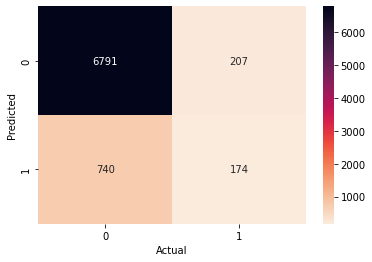

In [24]:
conf_mat_log = confusion_matrix(Target_test, predict_values)
cmap = sns.cm.rocket_r
sns.heatmap(conf_mat_log, annot=True, fmt='g', cmap = cmap)

plt.xlabel('Actual') 
plt.ylabel('Predicted')

# Confusion matrix help us to understand that we have the highest True negatives which is good but we have a lot of false positives. Lets see if we can reduce this using Decision tree. 

<strong><h3>Decision Tree<strong><h3>

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
D_tree = DecisionTreeClassifier()
D_tree = D_tree.fit(input_train, Target_train)

[Text(858.2024305050513, 1487.121212121212, 'ID <= 39780.0\ngini = 0.208\nsamples = 23735\nvalue = [20934, 2801]\nclass = y[0]'),
 Text(515.3815295984812, 1441.3636363636363, 'duration <= 524.5\ngini = 0.13\nsamples = 20841\nvalue = [19380, 1461]\nclass = y[0]'),
 Text(246.54603776675668, 1395.6060606060605, 'ID <= 30905.5\ngini = 0.058\nsamples = 18624\nvalue = [18066, 558]\nclass = y[0]'),
 Text(146.62635425963376, 1349.8484848484848, 'duration <= 453.5\ngini = 0.026\nsamples = 14507\nvalue = [14317, 190]\nclass = y[0]'),
 Text(79.70022707502514, 1304.090909090909, 'duration <= 360.5\ngini = 0.017\nsamples = 14024\nvalue = [13901, 123]\nclass = y[0]'),
 Text(38.54993955963261, 1258.3333333333333, 'ID <= 24038.5\ngini = 0.012\nsamples = 13050\nvalue = [12973, 77]\nclass = y[0]'),
 Text(16.039856750680663, 1212.5757575757575, 'duration <= 335.5\ngini = 0.002\nsamples = 10150\nvalue = [10138, 12]\nclass = y[0]'),
 Text(6.864218172780371, 1166.8181818181818, 'duration <= 181.5\ngini = 0.

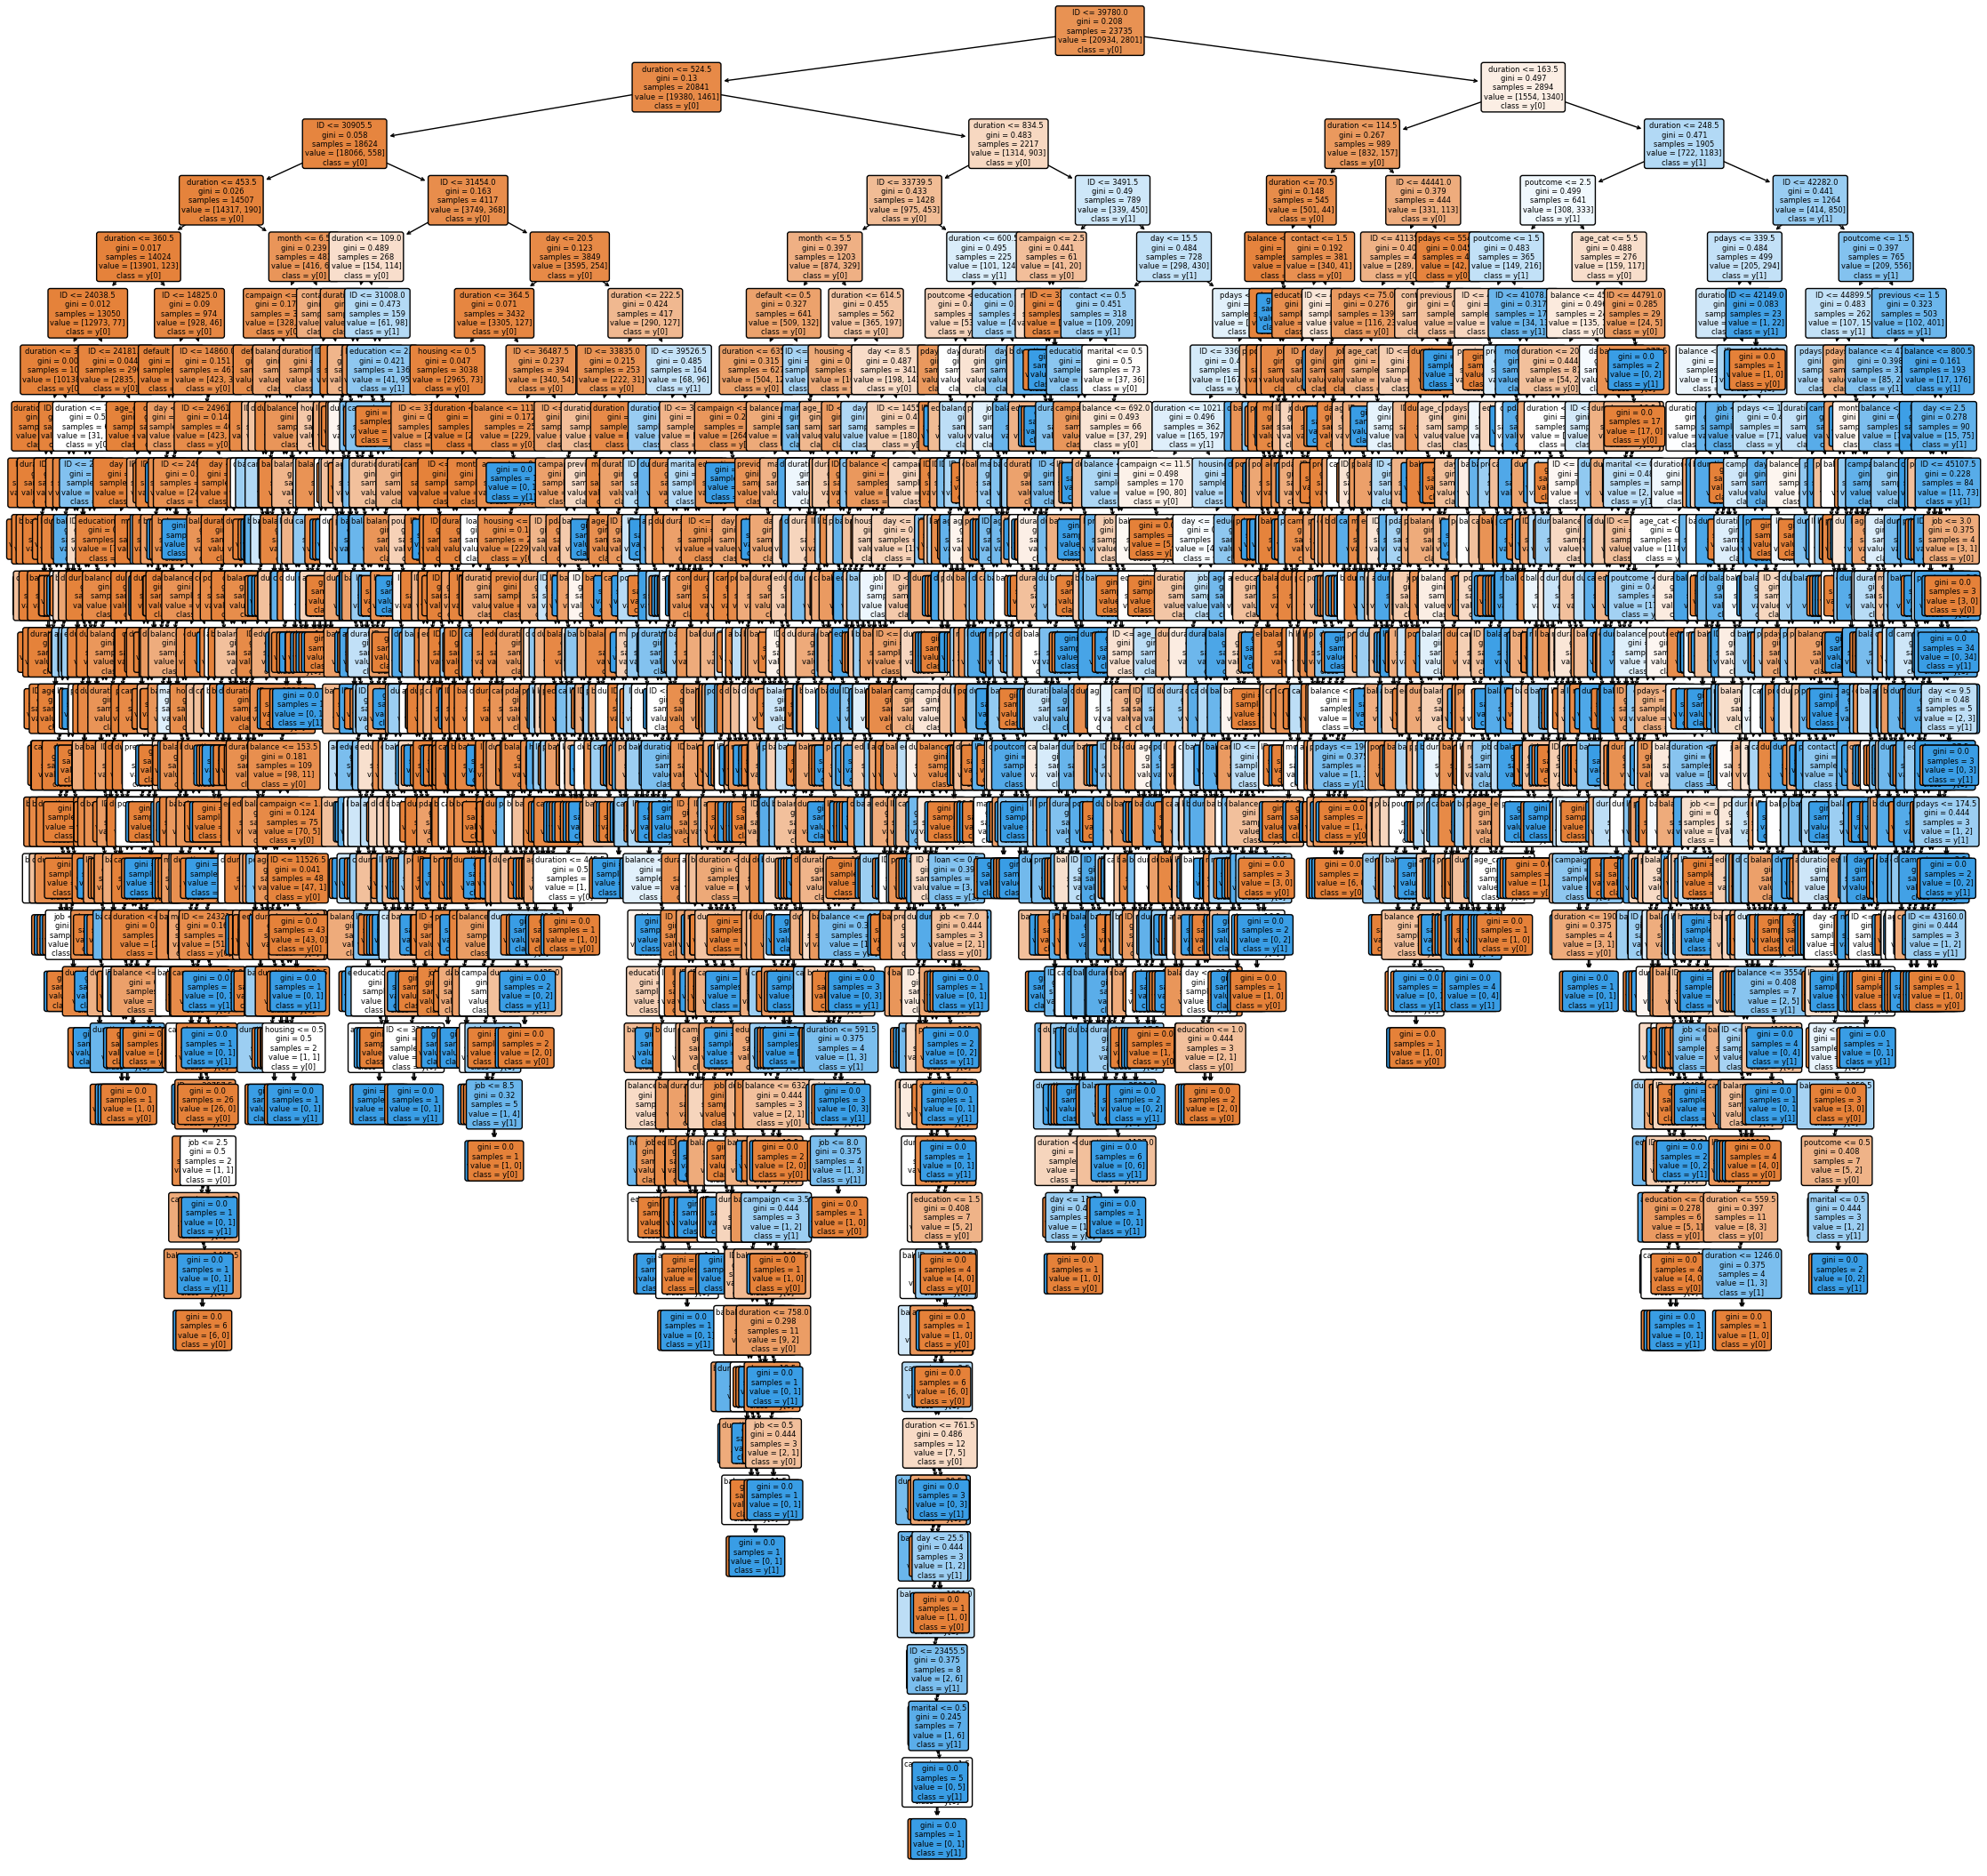

In [26]:
fig = plt.figure(figsize=(20,20), dpi =100)
plot_tree(D_tree,
         filled = True,
         rounded = True,
         class_names = True,
         feature_names = input.columns,
              fontsize=6)

The decision that we got is large and we need to reduce the nodes. The current model will most likely overfit to the splitted traning model. Hence, we need to performing pruning.

In [27]:
predict_values = D_tree.predict(input_test)
print(accuracy_score(Target_test, predict_values))

# Accuracy is 0.8820778564206269 on the splitted test dataset

0.8820778564206269


Text(33.0, 0.5, 'Predicted')

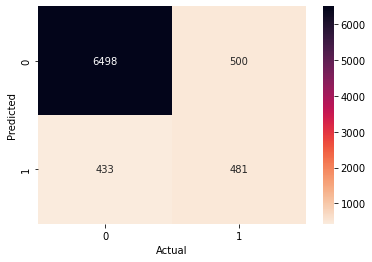

In [28]:
conf_mat_dec = confusion_matrix(Target_test, predict_values)
cmap = sns.cm.rocket_r
sns.heatmap(conf_mat_dec, annot=True, fmt='g', cmap = cmap)

plt.xlabel('Actual') 
plt.ylabel('Predicted')

# We have significantly reduced the false positives using the decision tree classifier.

<strong><h3>Pruning (CCP)<h3><strong>

In [29]:
Path = D_tree.cost_complexity_pruning_path(input_train, Target_train)
ccp_alphas = Path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
ccp_alphas

# List of Alphas possible alphas for our model.

array([0.00000000e+00, 1.65016502e-05, 2.06079812e-05, 2.10152971e-05,
       2.66835194e-05, 2.67503954e-05, 2.68667015e-05, 2.70476220e-05,
       2.74191553e-05, 2.75027503e-05, 2.75027503e-05, 2.76036408e-05,
       2.77687343e-05, 2.79683921e-05, 2.80547532e-05, 2.80879152e-05,
       3.15989046e-05, 3.15989046e-05, 3.15989046e-05, 3.15989046e-05,
       3.15989046e-05, 3.15989046e-05, 3.15989046e-05, 3.15989046e-05,
       3.28680945e-05, 3.34972035e-05, 3.37054982e-05, 3.37054982e-05,
       3.37054982e-05, 3.37954347e-05, 3.51098940e-05, 3.51098940e-05,
       3.51098940e-05, 3.51098940e-05, 3.51098940e-05, 3.51098940e-05,
       3.51098940e-05, 3.55487676e-05, 3.61130338e-05, 3.61130338e-05,
       3.61130338e-05, 3.61130338e-05, 3.68653887e-05, 3.68653887e-05,
       3.68653887e-05, 3.68653887e-05, 3.72073682e-05, 3.74505536e-05,
       3.74505536e-05, 3.74505536e-05, 3.74505536e-05, 3.74505536e-05,
       3.74505536e-05, 3.77124455e-05, 3.79186855e-05, 3.79186855e-05,
      

In [30]:
models=[]
for alpha in ccp_alphas:
    D_tree= DecisionTreeClassifier(random_state = 0, ccp_alpha=alpha)
    D_tree.fit(input_train, Target_train)
    models.append(D_tree)
    
# Creating decision tree models using each alpha value to determine which gives good accuracy in both training and test dataset simultaneously.

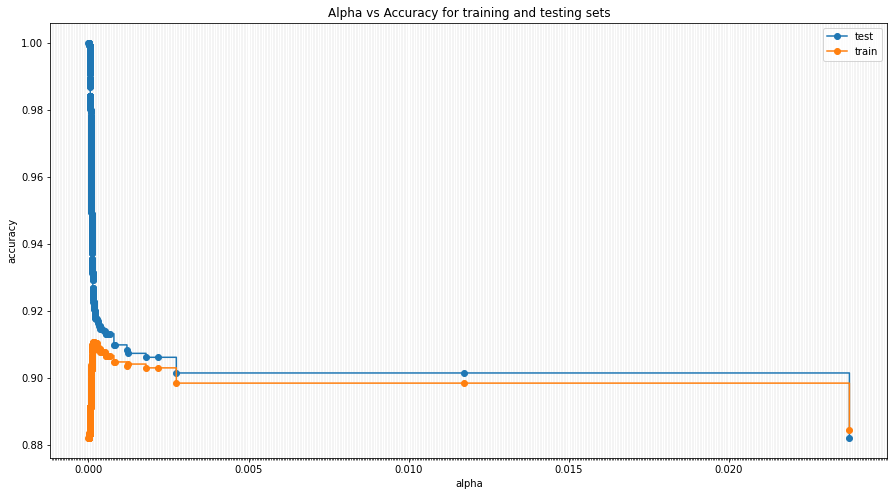

In [31]:
from matplotlib.ticker import MultipleLocator

train_scores = [D_tree.score(input_train, Target_train) for D_tree in models]
test_scores = [D_tree.score(input_test, Target_test) for D_tree in models]

spacing = 0.00005

minorLocator = MultipleLocator(spacing)

fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Alpha vs Accuracy for training and testing sets')

ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend({'train','test'})
ax.grid(axis='x', color='0.95', which = 'minor')

ax.xaxis.set_minor_locator(minorLocator)

plt.show()

# As we can see that the accuracy for both train and test sets are almost close at alpha = 0.005. Hence, this will be our ideal alpha value.

In [32]:
alpha_ideal = 0.005

D_tree= DecisionTreeClassifier(random_state = 0, ccp_alpha=alpha_ideal)
D_tree.fit(input_train, Target_train)

DecisionTreeClassifier(ccp_alpha=0.005, random_state=0)

[Text(387.5, 629.1666666666666, 'ID <= 39780.0\ngini = 0.208\nsamples = 23735\nvalue = [20934, 2801]\nclass = y[0]'),
 Text(193.75, 377.5, 'duration <= 524.5\ngini = 0.13\nsamples = 20841\nvalue = [19380, 1461]\nclass = y[0]'),
 Text(96.875, 125.83333333333337, 'gini = 0.058\nsamples = 18624\nvalue = [18066, 558]\nclass = y[0]'),
 Text(290.625, 125.83333333333337, 'gini = 0.483\nsamples = 2217\nvalue = [1314, 903]\nclass = y[0]'),
 Text(581.25, 377.5, 'duration <= 163.5\ngini = 0.497\nsamples = 2894\nvalue = [1554, 1340]\nclass = y[0]'),
 Text(484.375, 125.83333333333337, 'gini = 0.267\nsamples = 989\nvalue = [832, 157]\nclass = y[0]'),
 Text(678.125, 125.83333333333337, 'gini = 0.471\nsamples = 1905\nvalue = [722, 1183]\nclass = y[1]')]

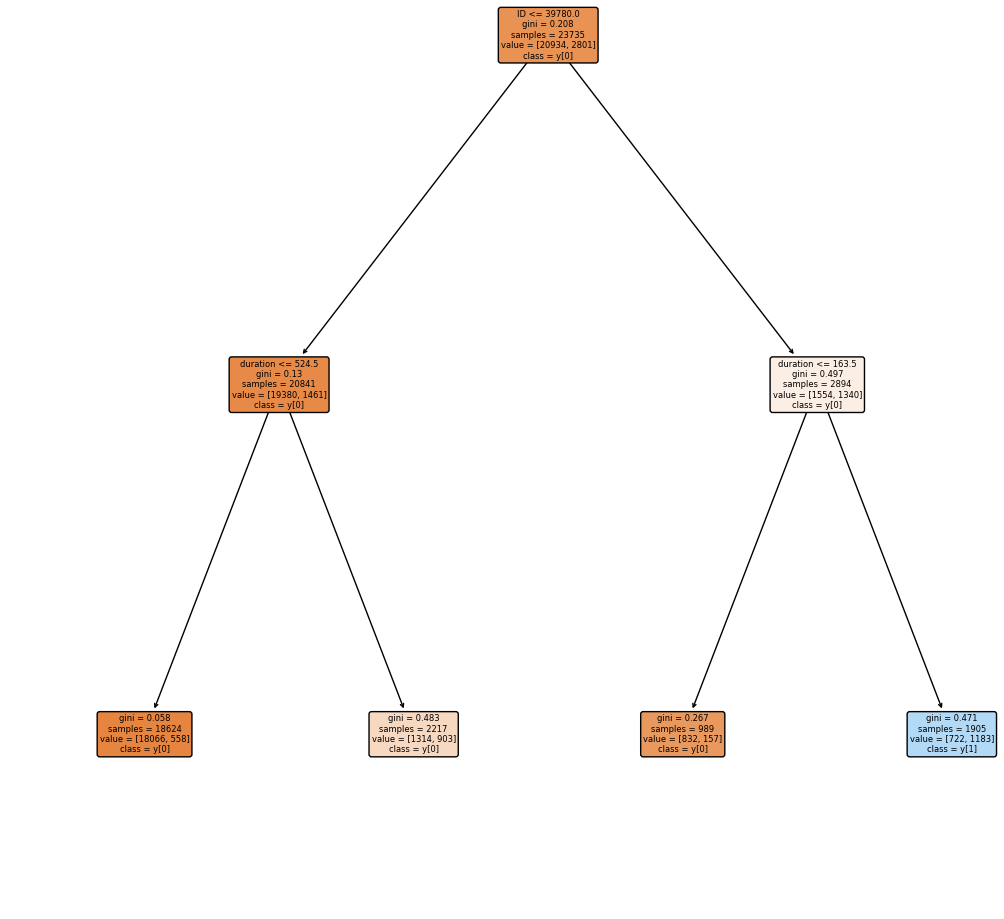

In [33]:
fig = plt.figure(figsize=(10,10), dpi =100)
plot_tree(D_tree,
         filled = True,
         rounded = True,
         class_names = True,
         feature_names = input.columns,
              fontsize=6)

# We have reduces the nodes significantly after pruning. From the above graph, we can see that the accuracy at alpha = 0.005 is slightly higher than 0.8803083923154702 which was the accuracy
# of the Logistic regression model. Hence we will choose the current Decision tree model with alpha 0.005

In [34]:
Final_test_predict = D_tree.predict(test_lab)
Final_test_predict

# 0 means 'no' and 1 means 'yes'

array([0, 1, 0, ..., 0, 1, 0])

In [39]:
submission_bank = pd.DataFrame()
submission_bank['subscribed'] = Final_test_predict

dict = {1: 'yes', 0:'no'}

# Mapping the correct values to the subscribed column

submission_bank['subscribed'] = submission_bank.subscribed.map(dict)
submission_bank

submission_bank.to_csv('submission_bank.csv', header=True, index=False)